<a href="https://colab.research.google.com/github/binliu0630/Deep_Learning/blob/master/TensorFlow2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.0.0-rc2'

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [0]:
# For beginner


model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
 ])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


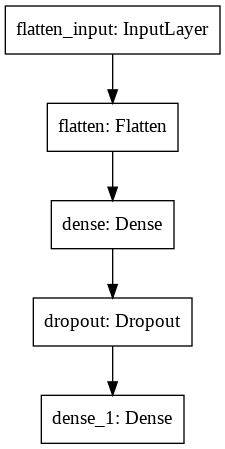

In [7]:
tf.keras.utils.plot_model(model)

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2965 - accuracy: 0.9135
Epoch 2/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1445 - accuracy: 0.9572
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1086 - accuracy: 0.9673
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0881 - accuracy: 0.9727
Epoch 5/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0752 - accuracy: 0.9771


In [12]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.0387 - accuracy: 0.9777


[0.0761130605066195, 0.9777]

In [0]:
# For expert
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [0]:
# add a channel dimention
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')
    
  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

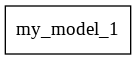

In [43]:
tf.keras.utils.plot_model(model)

In [0]:
# choose loss

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions )
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  
  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)
  
  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [41]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)
  
  print(f'Epoch: {epoch+1}, Loss: {train_loss.result(): .4f}, Accuracy: {train_accuracy.result()*100: .2f}%, Test Loss: {test_loss.result(): .4f}, Test Accuracy: {test_accuracy.result()*100: .2f}%')
  
  # reset metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_accuracy.reset_states()
  test_accuracy.reset_states()


Epoch: 1, Loss:  0.0016, Accuracy:  99.95%, Test Loss:  0.0748, Test Accuracy:  98.58%
Epoch: 2, Loss:  0.0019, Accuracy:  99.94%, Test Loss:  0.0761, Test Accuracy:  98.43%
Epoch: 3, Loss:  0.0015, Accuracy:  99.95%, Test Loss:  0.0779, Test Accuracy:  98.44%
Epoch: 4, Loss:  0.0015, Accuracy:  99.95%, Test Loss:  0.0795, Test Accuracy:  98.32%
Epoch: 5, Loss:  0.0018, Accuracy:  99.94%, Test Loss:  0.0801, Test Accuracy:  98.60%
